# On fancy  $\text{HA}^2\text{TS}$
<img src= "files/output/figures/queen_hat.jpg">


### Hidden-state Arbitrage-freee Affine Term Structure ($\text{HA}^2\text{TS}$) model

## How do we knowhen w to go long / short Break-even’s (Nominal Bonds vs ILBs) ?



<img src= "files/output/figures/fred_bkeven.jpg">

For example: if Break-Evens (BE) come down quite a bit, what is that? Should we go long or short Break-evens (by trading ILB’s and short Nominal Bonds or using derivatives)?



But  wait…. BE = Exp. Inf. + IRP

* Perhaps shorting BE’s is more attractive if Exp. Inf. implied by BE’s is “too low”


* If instead, it is the IRP that is low (or negative) and dragging BE’s down, then it may be reflecting that investors  expect  future inflation to coincide with a period of higher income growth and/or that nominal yields are coming down sharply due to safe haven flows 


* In general, Exp. Inf. and IRP implied by BE  can help inform our investment decisions


## Methodology

### $\text{HA}^2\text{TS}$ ingredients: model replicates / is heavily inspired by the  series of papers by Christensen – Diebold – Lopez – Rudebusch (2007, 2010, 2013)

In [5]:
from import_data import *
from estimation import *
%matplotlib inline
plt.close("all")

## Data

Importing and cleaning up (Nelson Siegel smoothed/fitted) yield data for TIPS and Nominal bonds...

Data source:

http://www.federalreserve.gov/econresdata/researchdata/feds200628.xls

https://www.federalreserve.gov/econresdata/researchdata/feds200805.xls

In [6]:
# Import data from FED and doing some cleaning

tips_data, nominal_data = ImportData.importUS_Data(plots=1,save=1)

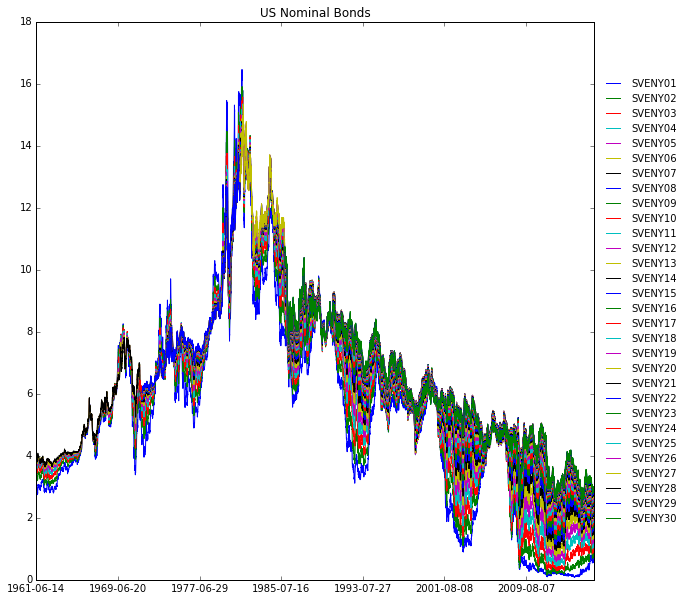

In [16]:
fig, ax = plt.subplots(1)
figures = {'fig1': fig, 'ax_fig1': ax}
nominal_data.plot(ax=figures['ax_fig1'],figsize=(10,10))
plt.legend(loc='center left',fontsize=9,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig1'].set_title('US Nominal Bonds')
plt.show()

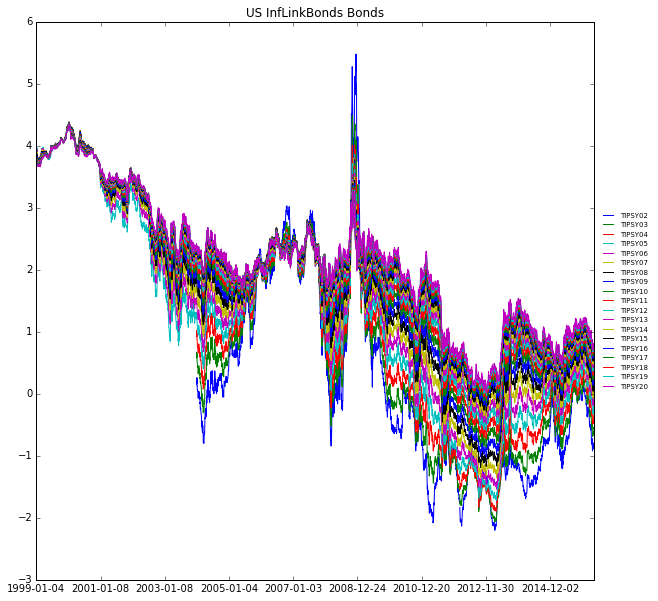

In [15]:
fig, ax = plt.subplots(1)
figures = {'fig2': fig, 'ax_fig2': ax}
tips_data.plot(ax=figures['ax_fig2'],figsize=(10,10))
plt.legend(loc='center left',fontsize=9,frameon=0, bbox_to_anchor=(1, 0.5))
figures['ax_fig2'].set_title('US InfLinkBonds Bonds')
plt.show()

In [ ]:
start_time = time.time()

# The interveal between each rolling window: the gap by which the estimationd window shifts 
# (e.g. with tgap = 1, rolling window is updated daily)
tgap = 30 

# Rolling window: 0 if using expanding window, 1 if using rolling window
rolling = 0 

#Rolling window size: size of rolling window (in years).. Use inf for full sample estimation
windowsize = np.inf;

np.set_printoptions(precision=32, suppress=True) #increase precision on  numeric values

# global variables
global a, Kp, lmda,lmda2,  Phi, sigma11, sigma22, sigma22_2, sigma33, sigma33_2,\ 
    sigma44, Sigma, thetap, Nfeval, figures, cum_log_likelihood,\
    Nfeval_vec, cum_log_likelihood_vec, doc, Nfeval_inner

    
################################################

# PRIMITIVES:
figures = []
# use allow_missing_data= 1 to extract ILB and Nominal dates where both are non-missing
allow_missing_data = 0 

# set frequency of the data: daily, monthly, quarterly, yearly
estim_freq = 'daily'  

fix_Phi = 0     # "1" if you want to fix the volatility of observed yields using covar of historical data
                # "0" if you want to jointly estimate it with other model parameters
setdiag_Kp = 0  # "1" if you want to Kp to be diagonal so the state variables are assumed independent
                # "0" if you want to Kp to be unrestricted

# options for initializing the Kalman filter error variance: 
#'steady_state' or 'unconditional' or 'identity' matrix
initV = 'unconditional'

# number of hidden state variables 4, or 6
num_states = 4      

# Specify the maturities of data we want to use
US_ilbmaturities = np.array([2, 3,  5, 6, 8, 9, 10])
US_nominalmaturities = np.array([2, 3,  5, 6, 8, 9, 10])
US_maturities = np.hstack((US_nominalmaturities, US_ilbmaturities))

############################################################

# Set start and end dates for estimation
sdate, edate = '2004-01-01', '2010-01-01'
print("start date: %s" % sdate)
print("end date: %s" % edate)

# extract data for desired maturities and dates
tips_data, nominal_data = ImportData.importUS_Data(US_ilbmaturities, US_nominalmaturities)
data = ImportData.extract_subset(tips_data, nominal_data, sdate, edate, allow_missing_data, estim_freq)

estimation =Rolling()
estimation.run(data, US_ilbmaturities, US_nominalmaturities, \
                estim_freq=estim_freq, num_states=num_states,\
                fix_Phi=fix_Phi, setdiag_Kp=setdiag_Kp, initV=initV,\
                stationarity_assumption=stationarity_assumption)

end_time = time.time()
print("--- %s seconds ---" % (end_time - start_time))


In [18]:

from scipy import integrate

In [ ]:
integrate.ode()